# Assignment11

## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment11

# Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import scipy.linalg as spla
from scipy import sparse

# Define functions to make reconstruction image :

## Define make_image_to_vector function
This function makes $\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33}\end{bmatrix}$ to $\begin{bmatrix} a_{11} \\ a_{21} \\ a_{31} \\ a_{12} \\ a_{22} \\ a_{32} \\ a_{13} \\ a_{23} \\ a_{33}\end{bmatrix}$

In [2]:
def make_image_to_vector(img):
    (height, width) = img.shape
    ret_img = np.empty(height * width)
    for i in range(width):
        ret_img[i*height:(i+1)*height] = img[:,i]
    
    return ret_img

## Define Dy function
This function makes Dy function corresponding to the original shape.

In [3]:
def Dy(shape):
    Dy = np.zeros((shape[0] * (shape[1]-1), shape[0] * shape[1]))
    
    for i in range(shape[1] - 1):
        for j in range(shape[0]):
            Dy[i*shape[0]+j, i*shape[0]+j] = -1
            Dy[i*shape[0]+j, (i+1)*shape[0]+j] = 1
    
    return sparse.csr_matrix(Dy)

print(Dy((3, 3)))

  (0, 0)	-1.0
  (0, 3)	1.0
  (1, 1)	-1.0
  (1, 4)	1.0
  (2, 2)	-1.0
  (2, 5)	1.0
  (3, 3)	-1.0
  (3, 6)	1.0
  (4, 4)	-1.0
  (4, 7)	1.0
  (5, 5)	-1.0
  (5, 8)	1.0


## Define Dx function
This function makes Dx function corresponding to the original shape.

In [4]:
def Dx(shape):
    Dx = np.zeros(((shape[0]-1) * shape[1], shape[0] * shape[1]))
    
    for i in range(shape[1]):
        for j in range(shape[0]-1):
            Dx[i*(shape[0]-1)+j, i*shape[0]+j] = -1
            Dx[i*(shape[0]-1)+j, i*shape[0]+j+1] = 1
    
    return sparse.csr_matrix(Dx)

print(Dx((3, 3)))

  (0, 0)	-1.0
  (0, 1)	1.0
  (1, 1)	-1.0
  (1, 2)	1.0
  (2, 3)	-1.0
  (2, 4)	1.0
  (3, 4)	-1.0
  (3, 5)	1.0
  (4, 6)	-1.0
  (4, 7)	1.0
  (5, 7)	-1.0
  (5, 8)	1.0


## Define make_leastSquareProblem function
This function makes least square problem to make reconstruction image.

In [5]:
def make_leastSquareProblem(lamb, img):
    img_vec = make_image_to_vector(img)
    dx, dy = Dx(img.shape), Dy(img.shape)
    
    img_len = len(img_vec)
    
    A = sparse.eye(img_len)
    A = sparse.vstack([A, np.sqrt(lamb)*dx, np.sqrt(lamb)*dy])
    
    b = np.zeros(img_len + dx.shape[0] + dy.shape[0])
    b[:img_len] = img_vec
    
    return A, b

## Define make_reconimg function
This function returns reconstruction image.

In [6]:
def make_reconimg(lamb, im_noise):
    A, b = make_leastSquareProblem(l, im_noise)
    sol, _, _, _, _, _, _, _, _, _ = sparse.linalg.lsqr(A, b)
    rec_img = np.empty(im.shape)
    for i in range(im.shape[1]):
        rec_img[:, i] = sol[im.shape[0]*i:im.shape[0]*(i+1)]
    return rec_img

## Define show_imgs function

In [7]:
def show_imgs(im, im_noise, im_recon):
    noise_recon = im_noise - im_recon
    error = np.linalg.norm(im - im_recon)

    p1 = plt.subplot(2,2,1)
    p1.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    p2 = plt.subplot(2,2,2)
    p2.set_title('noisy image')
    plt.imshow(im_noise, cmap='gray')
    plt.axis('off')

    p3 = plt.subplot(2,2,3)
    p3.set_title('reconstruction')
    plt.imshow(im_recon, cmap='gray')
    plt.axis('off')

    p4 = plt.subplot(2,2,4)
    p4.set_title('estimated noise')
    plt.imshow(noise_recon, cmap='gray')
    plt.axis('off')

    plt.show()

# Setting for input data :

In [8]:
file_image = 'cau.jpg'

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)
im = (im_gray - np.mean(im_gray)) / np.std(im_gray)
im = im[0:im.shape[0], 0:im.shape[1]]
(row, col) = im.shape


# Solve Least-square problem to make reconstruction image.

sigma = 0.2 lambda = 0.25


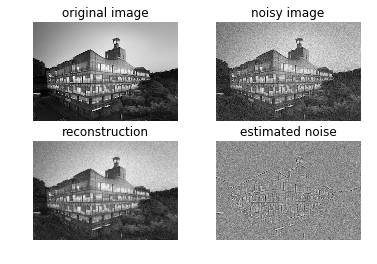

sigma = 0.2 lambda = 0.5


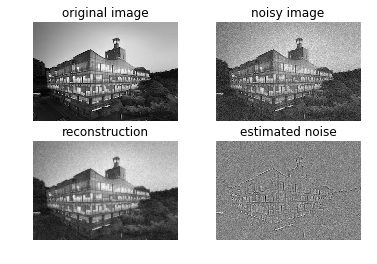

sigma = 0.2 lambda = 1


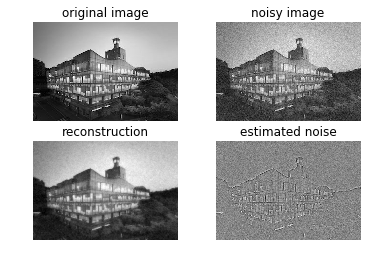

sigma = 0.5 lambda = 0.25


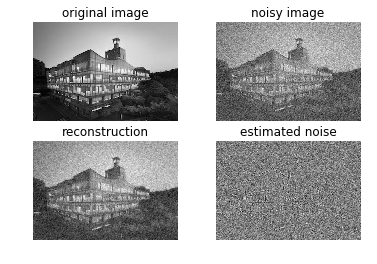

sigma = 0.5 lambda = 0.5


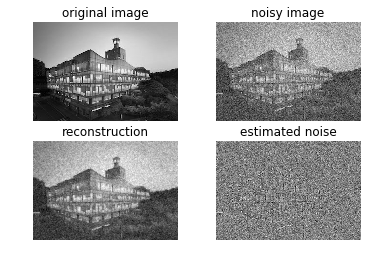

sigma = 0.5 lambda = 1


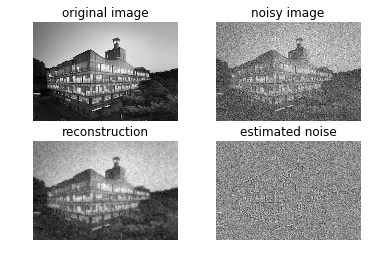

sigma = 1 lambda = 0.25


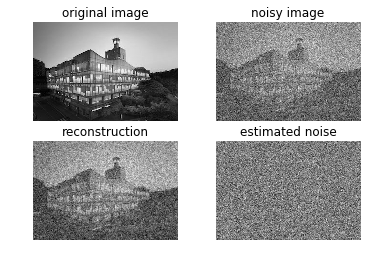

sigma = 1 lambda = 0.5


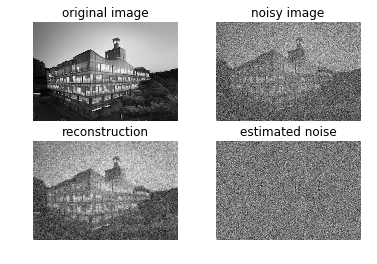

sigma = 1 lambda = 1


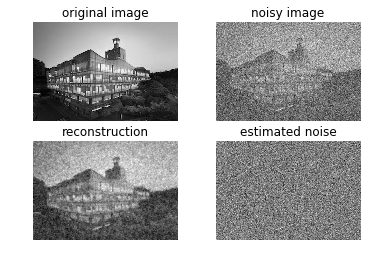

In [9]:
for s in [0.2, 0.5, 1]:
    for l in [0.25, 0.5, 1]:
        print("sigma =", s, "lambda =", l)

        noise_std = s # try with varying noise standard deviation
        noise = np.random.normal(0, noise_std, (row, col))
        im_noise = im + noise

        im_recon = make_reconimg(l, im_noise)
        show_imgs(im, im_noise, im_recon)